In [17]:
#importing libraries

import pandas as pd

from sklearn.linear_model import LinearRegression
# Importing pandas for data manipulation
# 
import pandas as pd 

# Importing numpy for mathematical functions
import numpy as np
# Importing matplotlib for creating visualisations
# 
import matplotlib.pyplot as plt
%matplotlib inline

Megaline_df = pd.read_csv('https://bit.ly/UsersBehaviourTelco')
Megaline_df

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
...,...,...,...,...,...
3209,122.0,910.98,20.0,35124.90,1
3210,25.0,190.36,0.0,3275.61,0
3211,97.0,634.44,70.0,13974.06,0
3212,64.0,462.32,90.0,31239.78,0


In [3]:
#checking our data
Megaline_df.shape

(3214, 5)

In [4]:
#Checking the statistical summary 
Megaline_df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


In [5]:
#checking for nulls
Megaline_df.isnull().sum()

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

Our Data has no null data

In [6]:
Megaline_df.duplicated().sum()

0

No Duplicates

In [13]:
## Performing Exploratory Analysis

corrMatrix = Megaline_df.corr()
corrMatrix

,calls,minutes,messages,mb_used,is_ultra
calls,1.000000,0.982083,0.177385,0.286442,0.207122
minutes,0.982083,1.000000,0.173110,0.280967,0.206955
messages,0.177385,0.173110,1.000000,0.195721,0.203830
mb_used,0.286442,0.280967,0.195721,1.000000,0.198568
is_ultra,0.207122,0.206955,0.203830,0.198568,1.000000


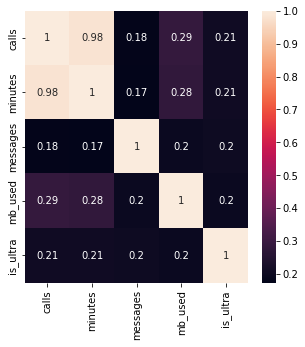

In [18]:
#visualisation
# --- 
# 
import seaborn as sns

# We define how big we want our visualisation
# 
plt.figure(figsize=(5, 5)) 

# Creating our visualisation
# 
sns.heatmap(corrMatrix, annot = True)

In [19]:
# Data Preparation


feature = Megaline_df.mb_used
target = Megaline_df.is_ultra


feature = Megaline_df.iloc[:, :-1].values
target = Megaline_df.iloc[:, 1].values

In [20]:
# Splitting the Dataset 
from sklearn.model_selection import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size=0.25, random_state=0)

In [21]:
# Training the Algorithm
from sklearn.linear_model import LinearRegression
lr = LinearRegression() 
lr.fit(feature_train, target_train) 

LinearRegression()

In [22]:
regressor = LinearRegression()
regressor.fit(feature_train, target_train)

y_pred = regressor.predict(feature_test)

In [24]:
# Making Predictions
# ---
# After training our algorithm, we can now make some preditions
# ---
# We create the y_pred variable, which will contain 
# all the predicted values for the input values in the X_test series
# ---
#
y_pred = regressor.predict(feature_test)

In [ ]:
#Comparing the outputs

Megaline_df = pd.DataFrame({'Actual': target_test, 'Predicted': y_pred})
Megaline_df.sample(10)

In [30]:
#evaluate our model performance
# --- 
#Using Root Mean Squared Error (RMSE). This is the square root of the mean of the squared errors.
# ---  
#
from sklearn import metrics 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(target_test, y_pred)))

Root Mean Squared Error: 1.1103232776384286e-12


# We can see that the value of root mean squared error is 0.111, 
# which is greater than 10% of the mean ie 0.306472. 
# This means that our algorithm fairly accurate and can make reasonably good predictions.